# **Twitter Sentiments Analysis**


**Problem Statement:**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech in the form of racist or sexist sentiment associated with it. So,my task is to classify racist or sexist tweets from other tweets.

**Theory:**

Sentiment Analysis is the most common text classification tool that analyses an incoming message and tells whether the underlying sentiment is positive, negative our neutral.


# Import Library
---



In [ ]:
import re
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

#Import Data

In [ ]:
# training data
train = pd.read_csv("train_tweet.csv")

# test data
test = pd.read_csv("test_tweets.csv")

#Data Exploration

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [ ]:
# non-racist/sexist related tweets
sum(train["label"] == 0)

29720

In [ ]:
# racist/sexist related tweets
sum(train["label"] == 1)

2242

In [ ]:
# check if there are any missing values
train.isnull().sum()
#train.isnull().values.any()

id       0
label    0
tweet    0
dtype: int64

# Data Cleaning

In [ ]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [ ]:

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles from train data(@user)
train['tweet'] = np.vectorize(remove_pattern)(train['tweet'], "@[\w]*")

In [ ]:
# remove twitter handles from test data(@user)
test['tweet'] = np.vectorize(remove_pattern)(test['tweet'], "@[\w]*")


In [ ]:
# remove special characters, numbers and punctuations
train['tweet'] = train['tweet'].str.replace("[^a-zA-Z#]", " ")
train.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide society now #motivation


In [ ]:
# remove special characters, numbers and punctuations
test['tweet'] = test['tweet'].str.replace("[^a-zA-Z#]", " ")
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,rd #bihday to my amazing hilarious #nephew...


In [ ]:
pip install preprocessor 

In [ ]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [ ]:
# remove short words
train['tweet'] = train['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
train.head()



,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty
3,4,0,#model love take with time
4,5,0,factsguide society #motivation


In [ ]:
# remove short words
test['tweet'] = test['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,#white #supremacists want everyone #birds #mov...
2,31965,safe ways heal your #acne #altwaystoheal #heal...
3,31966,cursed child book reservations already where w...
4,31967,#bihday amazing hilarious #nephew ahmir uncle ...


In [ ]:
train['tweet'] = train['tweet'].str.replace("[#]", " ")
train.head()

,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty
3,4,0,model love take with time
4,5,0,factsguide society motivation


In [ ]:
test['tweet'] = test['tweet'].str.replace("[#]", " ")
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedic...
1,31964,white supremacists want everyone birds mov...
2,31965,safe ways heal your acne altwaystoheal heal...
3,31966,cursed child book reservations already where w...
4,31967,bihday amazing hilarious nephew ahmir uncle ...


In [ ]:

# individual words considered as tokens
tokenized_tweet = train['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, lyft, credit, cause, they, offer, whe...
2                              [bihday, your, majesty]
3                      [model, love, take, with, time]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object

In [ ]:

# individual words considered as tokens
tokenized_tweet = test['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [studiolife, aislife, requires, passion, dedic...
1    [white, supremacists, want, everyone, birds, m...
2    [safe, ways, heal, your, acne, altwaystoheal, ...
3    [cursed, child, book, reservations, already, w...
4    [bihday, amazing, hilarious, nephew, ahmir, un...
Name: tweet, dtype: object

# Exploratory Data Analysis

In [127]:
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
# create a function to get the Polarity of all the tweets
def getPolarity(text):
 return TextBlob(text).sentiment.polarity


In [129]:
# create 2 columns 'Subjectivity' and 'Polarity'
train['Subjectivity']= train['tweet'].apply(getSubjectivity)
train['Polarity']= train['tweet'].apply(getPolarity)


In [ ]:
pip install wordcloud

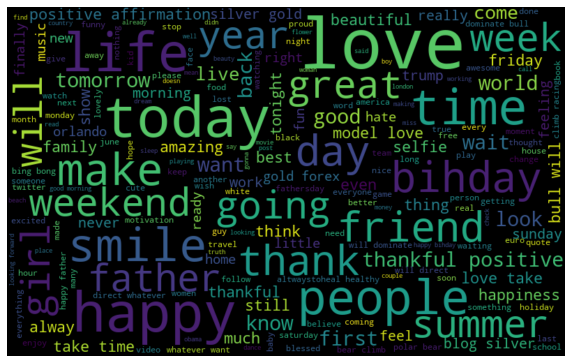

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in train['tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [130]:
def getAnalysis(score):
  if score<0:
     return 'Negative'
  elif score==0:
     return 'Neutral'
  else:
      return 'Positive'
train['Analysis']= train['Polarity'].apply(getAnalysis)
train

,id,label,tweet,Subjectivity,Polarity,Analysis
0,1,0,when father dysfunctional selfish drags kids i...,1.0,-0.5,Negative
1,2,0,thanks lyft credit cause they offer wheelchai...,0.2,0.2,Positive
2,3,0,bihday your majesty,0.0,0.0,Neutral
3,4,0,model love take with time,0.6,0.5,Positive
4,5,0,factsguide society motivation,0.0,0.0,Neutral
...,...,...,...,...,...,...
31957,31958,0,that youuu,0.0,0.0,Neutral
31958,31959,0,nina turner airwaves trying wrap herself mantl...,0.5,0.4,Positive
31959,31960,0,listening songs monday morning work,0.0,0.0,Neutral
31960,31961,1,sikh temple vandalised calgary wso condemns,0.0,0.0,Neutral


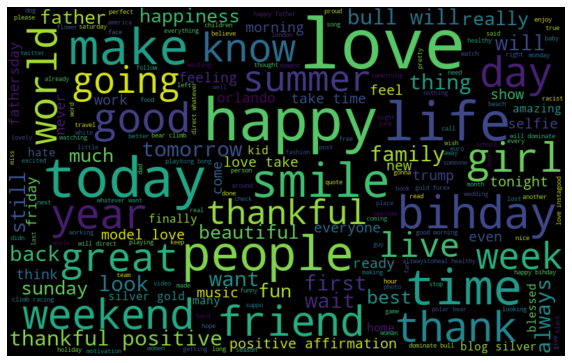

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in test['tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [136]:
def getAnalysis(score):
  if score<0:
     return 'Negative'
  elif score==0:
     return 'Neutral'
  else:
      return 'Positive'
test['Analysis']= test['Polarity'].apply(getAnalysis)
test

,id,tweet,Subjectivity,Polarity,Analysis
0,31963,studiolife aislife requires passion dedic...,0.000000,0.000000,Neutral
1,31964,white supremacists want everyone birds mov...,0.000000,0.000000,Neutral
2,31965,safe ways heal your acne altwaystoheal heal...,0.500000,0.500000,Positive
3,31966,cursed child book reservations already where w...,1.000000,0.500000,Positive
4,31967,bihday amazing hilarious nephew ahmir uncle ...,0.950000,0.550000,Positive
...,...,...,...,...,...
17192,49155,thought factory left right polarisation trump...,0.267857,0.142857,Positive
17193,49156,feeling like mermaid hairflip neverready fo...,0.000000,0.000000,Neutral
17194,49157,hillary campaigned today ohio used words li...,0.000000,0.000000,Neutral
17195,49158,happy work conference right mindset leads cult...,0.767857,0.542857,Positive


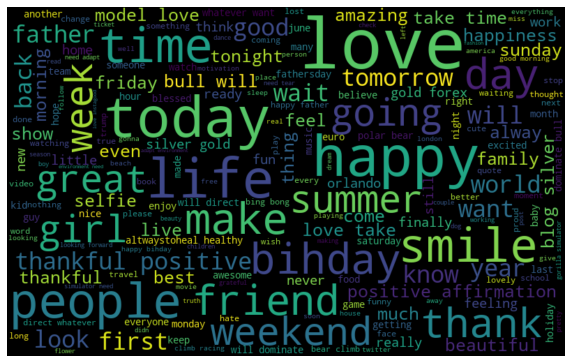

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in train['tweet'][train['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

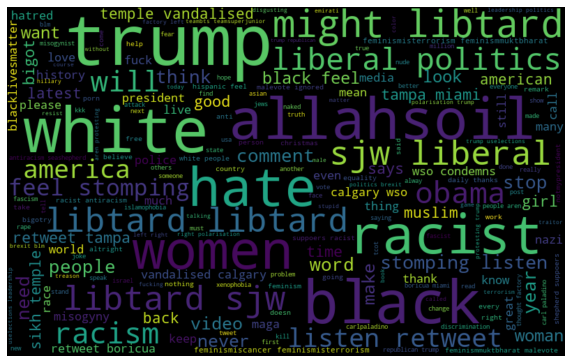

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in train['tweet'][train['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [137]:
train['Analysis'].value_counts()

Positive    15383
Neutral     12221
Negative     4358
Name: Analysis, dtype: int64

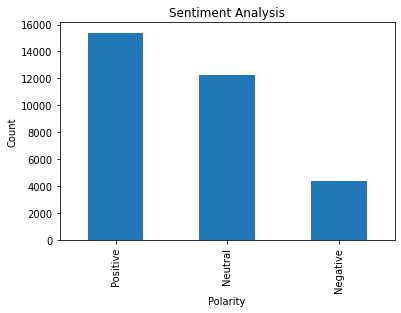

In [139]:
train['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

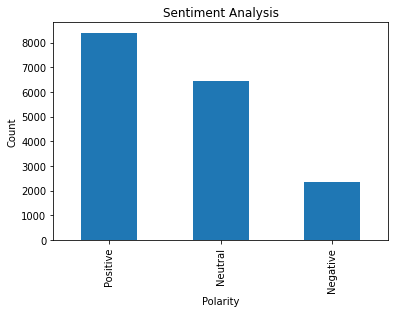

In [146]:
test['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [142]:
# Lets get positive tweets only
i=1
sortedDF = train.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Positive'):
   print(str(i)+ ') ' + sortedDF['tweet'][j])
   print()
   i=i+1

Streaming output truncated to the last 5000 lines.
12884) funny stammendment many distractions lousy maybe next year probab

12885) much love emotional momentous  win  game

12886)  good  gurlz

12887) have great weekend everyone  weekend

12888) thank santa best christmas present ever  cdnpoli  abpoli  yyc  yeg  canada  ottawa

12889) happy  altwaystoheal  healthy

12890) thankful family vacations  thankful  positive

12891)  jack  chelsea  loving this city majesty

12892)  goodday  bihday bihday  girl  photography  model happy bihday

12893) thanks helping  customer

12894) happy father  success  positive  quote  choice  kindness  love  monday  winning

12895)  fathers  day fathers step grand uncles brothers fathers every male role

12896) wait back where belong july come soon enough  promotion  success

12897) cody reed time going very good soon with these prospects

12898) right decent concerned human being that things black white

12899) rephrase free time time feel next weekend m

In [147]:
# Lets get negative tweets only
i=1
sortedDF = train.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Negative'):
   print(str(i)+ ') ' + sortedDF['tweet'][j])
   print()
   i=i+1

Streaming output truncated to the last 5000 lines.
1859) feeling  broke seriously read  america needs raise

1860) they said other critically injured they need people donate blood locally

1861) only thoughts money hungry self serving appears incapable anything broader than that  silly trump

1862) maybe much shatter already broken  lonely

1863) chicken breast with homemade sauce sauteed garlic spinach

1864) daria bihday  havingfun  livelife  girlfriends  nightout  beauty  divas gallow green

1865) this makes  mad afternoon walk this what  animalcruelty  animalabuse  animalrights

1866) sign that checked every single time

1867)  inked polar bear climb racing angry polar bear climb racing polar bear living cold places lookin

1868) romantic  pain somehow less life  disability meaningless  alive  whole

1869) black woman dating racist white your teach racist work either

1870) hard both  stuck same time what needs change happier

1871) geeze least finished newest film first

1872) bub

In [149]:
# Lets get neutral tweets only
i=1
sortedDF = train.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Neutral'):
   print(str(i)+ ') ' + sortedDF['tweet'][j])
   print()
   i=i+1

Streaming output truncated to the last 5000 lines.
9722) route london coldplay  london  coldplaywembley

9723) sale email offer  zen  positivity thinking  staup

9724) balade again again  jardinjaponais  nantes  sun  goodmoment  holidays  visite

9725) squirrel destroyed pepper plants yesterday jalapeno banana pepper

9726) know that might

9727) louisville kentucky woman goes rant  jcpenny  exposeracism  ignorance

9728) messaged

9729) please repo this openly racist reprehensible  whitesupremacist  repo  trump  depl

9730) tickets billy talent bought  billytalent

9731) cutie with booty  booty  cuties  bliss  life  cali  sanfrancisco  giants

9732) wish this office  glass  lakelife  wakeboarding  wakesurfing  slingshotwake

9733)  lubachka performance thelifeerotic  blog  silver  gold  forex

9734) saturday what your weekend plans know  shopthemint  weekend

9735) sometimes just have

9736) freedom friday dish salata  puff  pastry  spinach  ham  mozzarella  girl

9737)  oil intermark

In [151]:
# Lets get positive tweets only(test data)
i=1
sortedDF = test.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Positive'):
   print(str(i)+ ') ' + sortedDF['tweet'][j])
   print()
   i=i+1

Streaming output truncated to the last 5000 lines.
5903) happy bihday chris evans  chris  evans  chrisevans  bihday bihday

5904) broadcast network today free

5905) much time whats able meet committed  spectranet  unreliable

5906) thankful rain  thankful  positive

5907) times  degrassi  waytoofuckingreal  real  memories

5908) favorite neandehal nationalism compatible with white nationalism  altright  evolution  pseudoscience

5909) instagram minzy sister  moment  taiwan  raohe minzy your choice best

5910) june july august booked booking  writers  editing september beyond  blessed work with great  authors

5911) clueless about like fact james bland song golden slippers theme honored mummer

5912) great session this morning halton sign wish luck

5913) making things pretty what hope feed soon  eatmorecr  fullofcr  healthy  gfree

5914) thankful chocolate  thankful  positive

5915) make friends  ftm  queer  gay  smallnerd  ocd  problems  edmonton  yeg  single

5916) good morning worl

In [153]:
# Lets get negative tweets only(test data)
i=1
sortedDF = test.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Negative'):
   print(str(i)+ ') ' + sortedDF['tweet'][j])
   print()
   i=i+1

1) something inside dies eyes ness  smokeyeyes  tired  lonely  sof  grunge

2) stand behind this  guncontrolplease  senselessshootings  taketheguns  comicrelief  stillsad

3) limited edition rain shine today

4) never been this down myself entire life

5) chick gets fucked hottest naked lady

6)  never  again  thick  women  blacktina

7)  orangechicken attack bull game really think that head empty around city each side

8) granddaughter bihday tomorrow going pick play house little pool today

9) trying another make  sourdough  bread this underproofed  failed  baking

10) greatbritain eyes skies rafredarrows past mall

11) your ignorant informed tweets silly childish dimensional

12) jackblair  horny  hot  naughty  nasty  slut  young  shy  wet  nude  xxx  sexy  porn  kinky  snapshot

13) back some people  missingperson  havingfunalone  lonely  hothl

14) many alum friends waking shocked hear death scsu president  shocked

15) disappointed yesterday argument wasn even baselessly accused 

In [154]:
# Lets get neutral tweets only(test data)
i=1
sortedDF = test.sort_values(by=['Polarity'],ascending=False)
for j in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][j]=='Neutral'):
   print(str(i)+ ') ' + sortedDF['tweet'][j])
   print()
   i=i+1

Streaming output truncated to the last 5000 lines.
3933) life time memory  dreamproject  dreamproject over weekend  life  time

3934) introduce  travelsquad teen girls that will taking  london  paris

3935)  grateful that  money comes  increasing quantities from  multiple sources  continuous basis

3936) when haven even left college already found your dream team

3937) studio

3938) girls world movie nude women playing

3939) stay stronger  lifestyle  man  for  staystrong

3940) sania bopanna have been playing together iptl well chances even there paes this time

3941) chip delivery been like hours

3942) words cannot describe family must feeling goes them  disneygatorattack

3943) removal  aap spokesperson  alkalamba showcases dictatorial mindset  kejriwal

3944) trans bigbadboii dragon boat festival 

3945) bypo echocide  waterislife  poetry  poem  solidarity  nodapl  climatejustice  climatechage  epa  classwar

3946) electronic music from  bogota  colombia  puntohost  cedm  edm  fas

# Model Testing

In [140]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

In [ ]:
from sklearn.metrics import f1_score
print("f1 score for SVC is: ",f1_score(y_test, y_pred_svm)*100, '%')



f1 score for SVC is:  71.23745819397993 %


In [ ]:

from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  96.41255605381166 %
